In [9]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# Visual settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
# --- 2. Load Data ---
df = pd.read_csv("data/superstore.csv", encoding= "latin1")
print("Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Data loaded: {df.shape[0]} rows, {df.shape[1]} columns


In [19]:
# --- 3. Data Cleaning ---
df.columns = df.columns.str.strip()
df.rename(columns={"Sub-Category": "Sub-Category"}, inplace=True)

df["Order Data"] = pd.to_datetime(df["Order Date"], errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors='coerce')

df.dropna(subset=["Order Date", "Profit"], inplace= True)
df["Postal Code"] = df["Postal Code"].astype(int)

print("Data cleaned!")

Data cleaned!


In [21]:
# --- 4. Feature Engineering ---
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Key metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_margin = df['Profit Margin (%)'].mean()

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Average Profit Margin: {avg_margin:.1f}%")
print("Years in data:", sorted(df['Year'].unique()))

Total Sales: $2,297,201
Total Profit: $286,397
Average Profit Margin: 12.0%
Years in data: [np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]


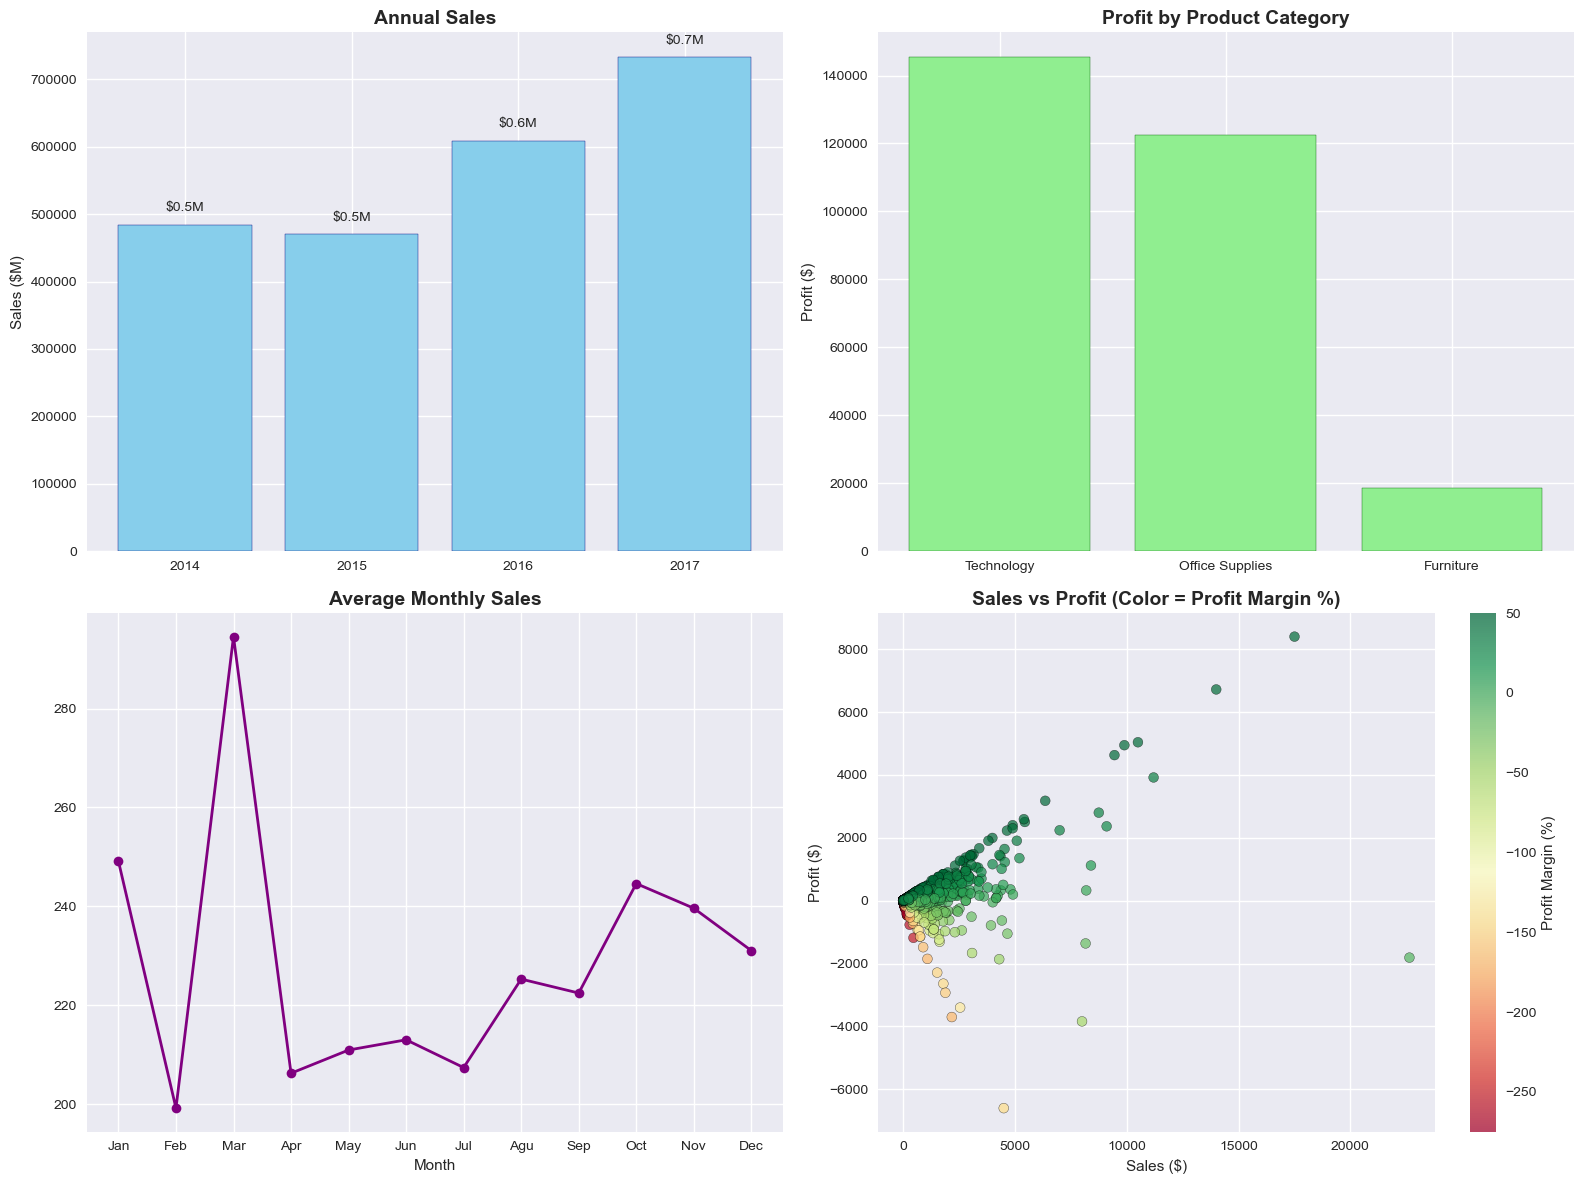

Dashboard saved to results/dashboard.png


In [37]:
# --- 5. Visualization Dashboard ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#5.1 Annual Sales
sales_by_year = df.groupby("Year")["Sales"].sum()
axes[0,0].bar(sales_by_year.index, sales_by_year.values, color="skyblue", edgecolor="navy")
axes[0,0].set_title("Annual Sales", fontsize=14, fontweight="bold")
axes[0,0].set_ylabel("Sales ($M)")
axes[0,0].set_xticks(sales_by_year.index)
for i, v in enumerate(sales_by_year.values):
    axes[0,0].text(sales_by_year.index[i], v + 20000, f"${v/1e6:.1f}M", ha="center", fontsize=10)

#5.2 Profit by category
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
axes[0,1].bar(profit_by_category.index, profit_by_category.values, color="lightgreen", edgecolor="darkgreen")
axes[0,1].set_title("Profit by Product Category", fontsize=14, fontweight="bold")
axes[0,1].set_ylabel("Profit ($)")

#5.3 Average Monthly Sales
monthly_sales = df.groupby("Month")["Sales"].mean()
axes[1,0].plot(monthly_sales.index, monthly_sales.values, marker="o", color="purple", linewidth=2)
axes[1,0].set_title("Average Monthly Sales", fontsize=14, fontweight="bold")
axes[1,0].set_xlabel("Month")
axes[1,0].set_xticks(range(1,13))
axes[1,0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Agu", "Sep", "Oct", "Nov", "Dec"])

#5.4 Sales vs Profit (Color = Margin)
scatter = axes[1,1].scatter(df["Sales"], df["Profit"],
                            c=df["Profit Margin (%)"], cmap="RdYlGn",
                            alpha=0.7, edgecolors="k", s=50)
axes[1,1].set_title("Sales vs Profit (Color = Profit Margin %)", fontsize=14, fontweight="bold")
axes[1,1].set_xlabel("Sales ($)")
axes[1,1].set_ylabel("Profit ($)")
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label("Profit Margin (%)")

plt.tight_layout()
os.makedirs("results", exist_ok=True)
plt.savefig("results/dashboard.png", dpi=300, bbox_inches="tight")
plt.show()

print("Dashboard saved to results/dashboard.png")